## Instalo e Importo la librería necesaria

In [2]:
pip install openpyxl

     -------------------------------------- 250.0/250.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Analizo el dataset y realizo la limpieza y transformación necesaria  

#### Como es un dataset pequeño, en formato excel, miro las hojas desde el mismo archivo excel, la hoja 0 tiene una tabla con información sobre el hecho, la hoja 1 un diccionario de los hechos, la hoja 2 una tabla donde se da información sobre las víctimas y la hoja 3 un diccionario respecto a éstas últimas.
#### La información relevante la encuentro en las hojas de hechos y victimas, por lo que pasaré a crear un dataframe con éstas, haciendo un merge.

In [3]:

archivo_homicidios = 'homicidios.xlsx'
hoja0 = 0
hoja2 = 2

df0 = pd.read_excel(archivo_homicidios, sheet_name=hoja0)
df2 = pd.read_excel(archivo_homicidios, sheet_name=hoja2)

# merge utilizando las columnas "ID" y "ID_hecho"
homicidios = pd.merge(df0, df2, left_on='ID', right_on='ID_hecho')



In [4]:
homicidios

,ID,N_VICTIMAS,FECHA_x,AAAA_x,MM_x,DD_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,ID_hecho,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


#### Elimino las columnas repetidas.

In [5]:
homicidios = homicidios.drop(columns=['FECHA_x','AAAA_x','MM_x','DD_x','PARTICIPANTES', 'ID_hecho', 'VICTIMA_x'])
homicidios

,ID,N_VICTIMAS,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",...,SD,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",...,PASAJEROS,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,NaN,MOM,RIESTRA AV. y MOM,...,AUTO,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",...,AUTO,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,NaN,TERRADA,GAONA AV. y TERRADA,...,CARGAS,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",4071.0,NaN,"PERON, EVA AV. 4071",...,CARGAS,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


## NULOS

In [19]:
homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   HORA                   717 non-null    object        
 3   HH                     717 non-null    object        
 4   LUGAR_DEL_HECHO        717 non-null    object        
 5   TIPO_DE_CALLE          717 non-null    object        
 6   Calle                  716 non-null    object        
 7   Altura                 133 non-null    float64       
 8   Cruce                  540 non-null    object        
 9   Dirección Normalizada  708 non-null    object        
 10  COMUNA                 717 non-null    int64         
 11  XY (CABA)              717 non-null    object        
 12  pos x                  717 non-null    object        
 13  pos y

#### Las columnas  Altura, Cruce y Dirección Normalizada tienen valores nulos, pero como no son relevantes para el análisis de datos las eliminare.
#### No son relevantes porque tenemos otras columnas que nos dan las coordenadas geograficas del accidente. 

In [6]:
homicidios = homicidios.drop(columns=['Altura','Cruce','Dirección Normalizada'])
homicidios

,ID,N_VICTIMAS,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,Point (98896.78238426 93532.43437792),-58.47533969,...,AUTO,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,...,PASAJEROS,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,Point (106684.29090040 99706.57687843),-58.39040293,...,AUTO,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,1,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,8,Point (99840.65224780 94269.16534422),-58.46503904,...,SD,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,1,Point (106980.32827929 100752.16915795),-58.38718297,...,PASAJEROS,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,RIESTRA AV.,7,Point (102728.60090138 98186.24929177),-58.43353773,...,AUTO,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
713,2021-0094,1,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,"DELLEPIANE, LUIS, TTE. GRAL.",9,Point (99624.29795829 97569.69801131),-58.46739825,...,AUTO,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
714,2021-0095,1,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,GAONA AV.,11,Point (99116.45492358 101045.23284826),-58.47293407,...,CARGAS,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
715,2021-0096,1,10:30:00,10,AV. EVA PERON 4071,AVENIDA,"PERON, EVA AV.",9,Point (99324.54463985 97676.26932409),-58.47066794,...,CARGAS,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


#### Busco ID nulos

In [22]:
homicidios[homicidios['ID'].isnull()]

,ID,N_VICTIMAS,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO


## Duplicados

#### Busco id duplicados

In [23]:
duplicados = homicidios.duplicated(subset=['ID'], keep=False)
duplicados_df = homicidios[duplicados]
duplicados_df

,ID,N_VICTIMAS,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,DIRECTORIO AV.,7,Point (100232.38564985 99530.25843190),-58.46076550,...,CARGAS,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
30,2016-0041,2,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,DIRECTORIO AV.,7,Point (100232.38564985 99530.25843190),-58.46076550,...,CARGAS,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
98,2016-0126,2,22:45:00,22,IRIGOYEN Y TINOGASTA,CALLE,IRIGOYEN,10,Point (94275.54271123 100886.87954649),-58.52572109,...,CARGAS,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
99,2016-0126,2,22:45:00,22,IRIGOYEN Y TINOGASTA,CALLE,IRIGOYEN,10,Point (94275.54271123 100886.87954649),-58.52572109,...,CARGAS,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
163,2017-0026,2,05:15:00,5,AV. PERITO MORENO Y FOURNIER,AVENIDA,"MORENO, PERITO AV.",4,Point (104113.67806500 97722.68219304),-58.41842777,...,OBJETO FIJO,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
164,2017-0026,2,05:15:00,5,AV. PERITO MORENO Y FOURNIER,AVENIDA,"MORENO, PERITO AV.",4,Point (104113.67806500 97722.68219304),-58.41842777,...,OBJETO FIJO,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
173,2017-0035,3,05:00:00,5,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",1,Point (109583.11620052 102006.72069921),-58.35881506,...,OBJETO FIJO,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
174,2017-0035,3,05:00:00,5,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",1,Point (109583.11620052 102006.72069921),-58.35881506,...,OBJETO FIJO,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,3,05:00:00,5,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",1,Point (109583.11620052 102006.72069921),-58.35881506,...,OBJETO FIJO,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
176,2017-0036,2,18:00:00,18,CURUPAYTI Y COLECTORA AV. GRAL. PAZ,GRAL PAZ,"PAZ, GRAL. AV.",12,Point (95300.18060161 105287.23850698),-58.51452347,...,PASAJEROS,2017-03-29,2017,3,29,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,SD,2017-03-29 00:00:00


#### Elimino filas duplicadas

In [7]:
homicidios= homicidios.drop_duplicates(subset=['ID'])


## Valores Faltantes

#### Busco valores Faltantes

In [25]:
valores_faltantes = homicidios.isnull().sum()

print(valores_faltantes)


ID                     0
N_VICTIMAS             0
HORA                   0
HH                     0
LUGAR_DEL_HECHO        0
TIPO_DE_CALLE          0
Calle                  1
COMUNA                 0
XY (CABA)              0
pos x                  0
pos y                  0
ACUSADO                0
FECHA_y                0
AAAA_y                 0
MM_y                   0
DD_y                   0
ROL                    0
VICTIMA_y              0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64


## Outliers 

#### Al observar el dataset, a simple vista se puede ver que, respecto al numero de víctimas, no hay outliers. En la mayoría de accidentes, la vícitma fatal es 1, pero hay casos en que se ha llegado a 3, valor que no es atípico, teniendo en cuenta la temática que nos ocupa.
#### De todas formas, utilizamos Z-Score para visualizar a los valores que superen 3 desviaciones estandar.

In [26]:
from scipy import stats

z_scores = stats.zscore(homicidios['N_VICTIMAS'])
threshold = 3

# Filtrar outliers
outliers = homicidios[(z_scores > threshold) | (z_scores < -threshold)]



In [27]:
outliers

,ID,N_VICTIMAS,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
29,2016-0041,2,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,DIRECTORIO AV.,7,Point (100232.38564985 99530.25843190),-58.46076550,...,CARGAS,2016-03-29,2016,3,29,CONDUCTOR,MOTO,MASCULINO,54,2016-03-29 00:00:00
98,2016-0126,2,22:45:00,22,IRIGOYEN Y TINOGASTA,CALLE,IRIGOYEN,10,Point (94275.54271123 100886.87954649),-58.52572109,...,CARGAS,2016-09-18,2016,9,18,CONDUCTOR,AUTO,MASCULINO,37,SD
163,2017-0026,2,05:15:00,5,AV. PERITO MORENO Y FOURNIER,AVENIDA,"MORENO, PERITO AV.",4,Point (104113.67806500 97722.68219304),-58.41842777,...,OBJETO FIJO,2017-02-26,2017,2,26,PASAJERO_ACOMPAÑANTE,AUTO,FEMENINO,23,2017-02-26 00:00:00
173,2017-0035,3,05:00:00,5,AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUC...,AVENIDA,"ACHAVAL RODRIGUEZ, T., DR. AV.",1,Point (109583.11620052 102006.72069921),-58.35881506,...,OBJETO FIJO,2017-03-23,2017,3,23,CONDUCTOR,AUTO,MASCULINO,28,2017-03-23 00:00:00
176,2017-0036,2,18:00:00,18,CURUPAYTI Y COLECTORA AV. GRAL. PAZ,GRAL PAZ,"PAZ, GRAL. AV.",12,Point (95300.18060161 105287.23850698),-58.51452347,...,PASAJEROS,2017-03-29,2017,3,29,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,SD,2017-03-29 00:00:00
186,2017-0050,2,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,9,Point (. .),.,...,CARGAS,2017-04-28,2017,4,28,CONDUCTOR,MOTO,MASCULINO,46,2017-04-28 00:00:00
237,2017-0108,2,04:53:08,4,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,"PAZ, GRAL. AV.",12,Point (97098.48468623 109019.96106626),-58.49491054,...,AUTO,2017-09-02,2017,9,2,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,17,2017-09-02 00:00:00
242,2017-0112,2,09:32:17,9,AU 25 DE MAYO Y AV. VARELA,AUTOPISTA,AUTOPISTA 25 DE MAYO,7,Point (100479.14412395 98812.52258620),-58.45807401,...,OBJETO FIJO,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,1,SD
253,2017-0126,2,06:15:00,6,AV. RIESTRA Y CAÑADA DE GOMEZ,AVENIDA,RIESTRA AV.,8,Point (98466.20276785 94207.42419155),-58.48003734,...,OBJETO FIJO,2017-10-14,2017,10,14,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,39,SD
277,2017-0153,2,02:00:00,2,ROSARIO Y AV. LA PLATA,AVENIDA,ROSARIO,6,Point (103186.65733155 101217.09689755),-58.42855267,...,PASAJEROS,2017-12-11,2017,12,11,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2017-12-12 00:00:00


#### Busco fechas duplicadas, para analizar si hay datos atipicos.

In [29]:
duplicados = homicidios.duplicated(subset=['FECHA_y'], keep=False)
duplicados_df = homicidios[duplicados]
duplicados_df.head(60)

,ID,N_VICTIMAS,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
5,2016-0008,1,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,...,OBJETO FIJO,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
6,2016-0009,1,19:10:00,19,NOGOYA Y JOAQUIN V. GONZALES,CALLE,NOGOYA,11,Point (96545.87592078 102330.67262199),-58.50095869,...,AUTO,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
10,2016-0015,1,05:14:00,5,AV SCALABRINI ORTIZ Y VERA,AVENIDA,"SCALABRINI ORTIZ, RAUL AV.",15,Point (102357.43746828 103343.52002839),-58.43760020,...,AUTO,2016-02-14,2016,2,14,PEATON,PEATON,FEMENINO,16,2016-02-14 00:00:00
11,2016-0016,1,22:00:00,22,AV REGIMIENTO DE PATRICIOS Y QUINQUELA MARTIN ...,AVENIDA,REGIMIENTO DE PATRICIOS AV.,4,Point (108661.59115206 98481.75445555),-58.36882665,...,AUTO,2016-02-14,2016,2,14,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,19,2016-02-14 00:00:00
13,2016-0019,1,09:30:00,9,LISANDRO DE LA TORRE Y SEVERO GARCIA GRANDE DE...,CALLE,"DE LA TORRE, LISANDRO",9,Point (95727.37083199 97179.35560349),-58.50990884,...,PASAJEROS,2016-02-17,2016,2,17,PEATON,PEATON,FEMENINO,65,2016-02-17 00:00:00
14,2016-0020,1,16:00:00,16,SUIPACHA 156,CALLE,SUIPACHA,1,Point (107684.31807562 102519.17333314),-58.37952223,...,AUTO,2016-02-17,2016,2,17,PEATON,PEATON,MASCULINO,59,2016-03-02 00:00:00
15,2016-0021,1,23:35:00,23,AV DIRECTORIO Y CURAPALIGUE,AVENIDA,DIRECTORIO AV.,7,Point (101074.94198885 99848.19369046),-58.45157703,...,AUTO,2016-02-17,2016,2,17,CONDUCTOR,AUTO,MASCULINO,34,2016-02-17 00:00:00
17,2016-0025,1,04:50:00,4,AV GRAL PAZ Y AV 27 DE FEBRERO,GRAL PAZ,"PAZ, GRAL. AV.",8,Point (100077.95205948 91571.23307293),-58.46244952,...,AUTO,2016-02-28,2016,2,28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,2016-02-28 00:00:00
18,2016-0026,1,07:30:00,7,HOLMBERG Y VEDIA,CALLE,HOLMBERG,12,Point (97350.75566590 109083.19420265),-58.49216191,...,OBJETO FIJO,2016-02-28,2016,2,28,CONDUCTOR,AUTO,MASCULINO,30,2016-03-04 00:00:00
19,2016-0027,1,09:35:00,9,CURAPALIGUE Y AVELINO DIAZ,AVENIDA,CURAPALIGUE AV.,7,Point (101679.82794245 98973.02976850),-58.44497874,...,AUTO,2016-02-28,2016,2,28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,SD


In [30]:
duplicados_df.tail(60)

,ID,N_VICTIMAS,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,COMUNA,XY (CABA),pos x,...,ACUSADO,FECHA_y,AAAA_y,MM_y,DD_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
448,2019-0013,1,07:30:00,7,SALVIGNY Y MOM,CALLE,SALVIGNY,7,Point (102701.07793891 98301.55899449),-58.43383830,...,AUTO,2019-02-20,2019,2,20,PEATON,PEATON,MASCULINO,39,2019-03-02 00:00:00
449,2019-0014,1,17:30:00,17,"LAMARCA, EMILIO 5402",CALLE,"LAMARCA, EMILIO",11,Point (95105.42229190 104734.49416290),-58.51664939,...,OBJETO FIJO,2019-02-20,2019,2,20,CONDUCTOR,MOTO,MASCULINO,69,2019-02-20 00:00:00
452,2019-0017,1,07:00:00,7,MEXICO Y PICHINCHA,CALLE,MEXICO,3,Point (105883.57359899 101434.40486977),-58.39914719,...,PASAJEROS,2019-03-03,2019,3,3,CONDUCTOR,AUTO,MASCULINO,22,2019-03-07 00:00:00
453,2019-0018,1,23:30:00,23,"CANTILO, INT. Y UDAONDO, GUILLERMO AV.",AUTOPISTA,"CANTILO, INT.",13,Point (101287.58627255 109848.96522762),-58.44927253,...,AUTO,2019-03-03,2019,3,3,PEATON,PEATON,FEMENINO,29,2019-03-03 00:00:00
456,2019-0021,1,22:50:00,22,BOYACA AV. Y YERBAL,AVENIDA,BOYACA AV.,7,Point (100537.72694403 100405.74808196),-58.45743597,...,AUTO,2019-03-15,2019,3,15,CONDUCTOR,MOTO,MASCULINO,23,2019-03-16 00:00:00
457,2019-0022,1,1900-01-02 00:00:00,0,ENTRE RIOS AV. BAJO PUENTE AUTOPISTA (1260 APROX),AVENIDA,ENTRE RIOS AV.,1,Point (106608.39392805 100635.27735528),-58.39123782,...,SD,2019-03-15,2019,3,15,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,SD,2019-03-15 00:00:00
461,2019-0026,1,07:32:00,7,"FERNANDEZ DE LA CRUZ, F. , GRAL. AV. Y LARRAZABAL",AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,Point (98491.08733048 93092.87943671),-58.47976785,...,PASAJEROS,2019-03-28,2019,3,28,PEATON,PEATON,MASCULINO,SD,2019-03-28 00:00:00
462,2019-0027,1,11:11:00,11,SANTA FE AV. Y AZCUENAGA,AVENIDA,SANTA FE AV.,2,Point (105815.73438780 103786.90549585),-58.39990285,...,MULTIPLE,2019-03-28,2019,3,28,CICLISTA,BICICLETA,MASCULINO,37,2019-03-28 00:00:00
474,2019-0039,1,03:05:00,3,SAN PEDRITO AV. Y DIRECTORIO AV.,AVENIDA,SAN PEDRITO AV.,7,Point (99615.63172945 99306.93173343),-58.46749188,...,AUTO,2019-05-09,2019,5,9,CONDUCTOR,MOTO,MASCULINO,28,2019-05-09 00:00:00
475,2019-0040,1,12:45:00,12,PUAN Y SANTANDER,CALLE,PUAN,7,Point (101894.68493124 99164.78448252),-58.44263580,...,SD,2019-05-09,2019,5,9,CONDUCTOR,MOTO,MASCULINO,44,2019-05-15 00:00:00


#### Analizado el dataset, no se advierten valores atipicos en las fechas.

## Análisis de Datos

#### Visualizo la evolución del numero de víctimas fatales por año.

C:\Users\HP\AppData\Local\Temp\ipykernel_12380\142707637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios['FECHA_y'] = pd.to_datetime(homicidios['FECHA_y'])
C:\Users\HP\AppData\Local\Temp\ipykernel_12380\142707637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios['AÑO'] = homicidios['FECHA_y'].dt.year


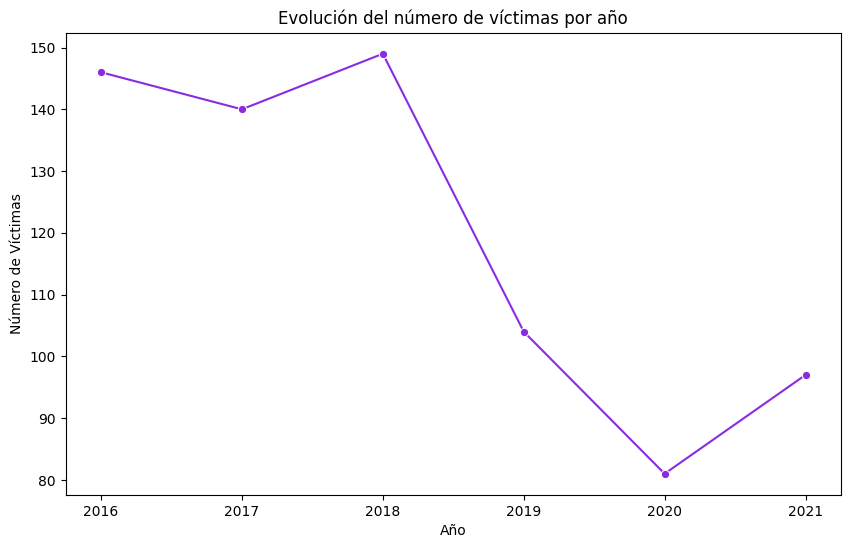

In [31]:
# Convierto la columna de fecha al formato adecuado
homicidios['FECHA_y'] = pd.to_datetime(homicidios['FECHA_y'])

# Creo una nueva columna para el año
homicidios['AÑO'] = homicidios['FECHA_y'].dt.year

# Agrupo por año y sumo el número de víctimas
victimas_por_año = homicidios.groupby('AÑO')['N_VICTIMAS'].sum().reset_index()

# Visualizo la evolución del número de víctimas por año
plt.figure(figsize=(10, 6))
sns.lineplot(x='AÑO', y='N_VICTIMAS', data=victimas_por_año, color='blueviolet', marker='o')
plt.title('Evolución del número de víctimas por año')
plt.xlabel('Año')
plt.ylabel('Número de Víctimas')
plt.show()


#### Se nota un descenso abrupto del 2018 a 2019, el cual continúa en el 2020, y vuelve a subir ligeramente en el 2021. 
#### Surge una primer hipótesis, estos datos coinciden con el confinamiento por la pandemia, por lo que se analizará la evolucón por mes, de los últimos años.

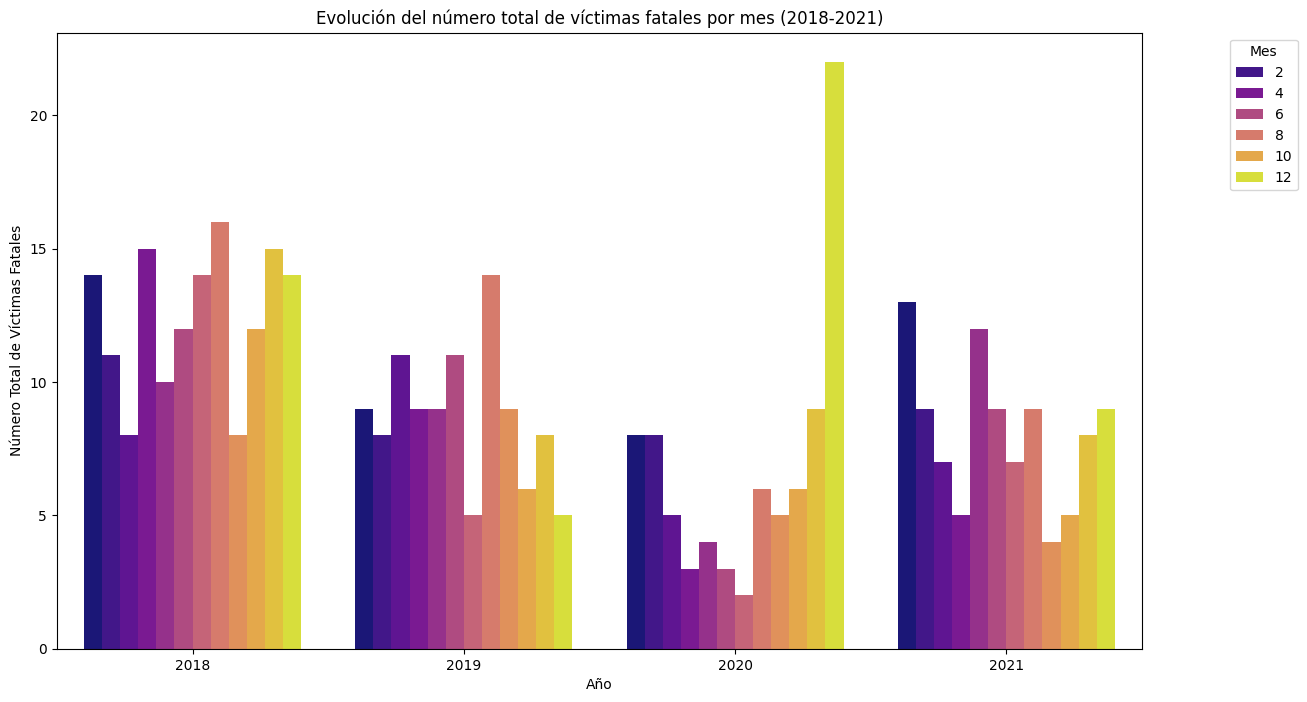

In [32]:
# Filtro por los años de interés
años_de_interes = [2018, 2019, 2020, 2021]
homicidios_años_interes = homicidios[homicidios['AAAA_y'].isin(años_de_interes)]

# Agrupo y sumar las víctimas por año y mes
victimas_por_año_mes = homicidios_años_interes.groupby(['AAAA_y', 'MM_y'])['N_VICTIMAS'].sum().reset_index()

# Creo el gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='AAAA_y', y='N_VICTIMAS', hue='MM_y', data=victimas_por_año_mes, palette='plasma')
plt.title('Evolución del número total de víctimas fatales por mes (2018-2021)')
plt.xlabel('Año')
plt.ylabel('Número Total de Víctimas Fatales')
plt.legend(title='Mes', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## Año 2020

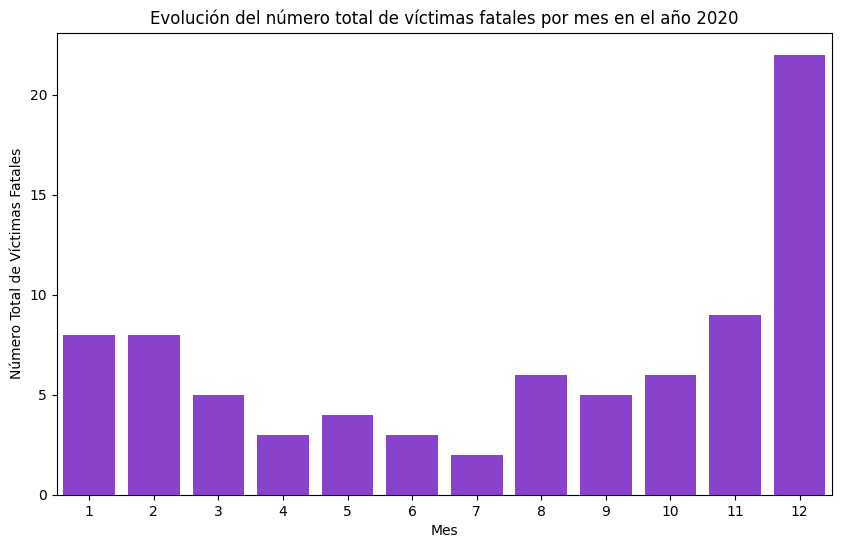

In [33]:
# Filtro por el año 2020
homicidios_2020 = homicidios[homicidios['AAAA_y'] == 2020]

# Agrupo y sumo las víctimas por mes
victimas_por_mes = homicidios_2020.groupby('MM_y')['N_VICTIMAS'].sum().reset_index()

# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='MM_y', y='N_VICTIMAS', data=victimas_por_mes, color='blueviolet')
plt.title('Evolución del número total de víctimas fatales por mes en el año 2020')
plt.xlabel('Mes')
plt.ylabel('Número Total de Víctimas Fatales')
plt.show()

#### Analizada la evolucion de las victimas fatales por mes en los años 2018, 2019, 2020 y 2021, podemos confirmar la primer hipótesis.
#### De los gráficos se desprende que en el año 2020 empieza a disminuir la cantidad de víctimas fatales, lo que coincide con que en Argentina, a partir del 20 de marzo del 2020 se decretó el confinamiento obligatorio. 
#### También se puede observar cómo durante los meses en que el confinamiento fue más estricto, el número de víctimas fatales se mantuvo bajo. En ese sentido, al levantarse el confinameinto obligatorio en noviembre de 2020, aumento drásticamente el numero de fallecimientos en accidentes.
#### Por ello podemos concluir que el motivo de la baja de víctimas fatales en 2020 se debió a la cuarentena obligatoria.

## Año 2019 

#### En este año, también podemos observar como ha habido una baja significativa en la cantidad de victimas fatales, con respecto al año anterior.
#### Por ello acudi a otras fuentes de información complementarias, a fin de conocer la causa de la baja de victimas fatales.
#### De notas periodísticas que adjunto en el readme, surge que el gobierno de la Ciudad, en el marco del Plan de Seguridad Vial Porteño, se puso como objetivo reducir el porcentaje de muertes, en un periodo de 4 años, comenzando a partir de 2016. Para ello incrementaron diversos controles viales y se realizaron capacitaciones a choferes.
#### Del analisis de los graficos podemos observar que en el año 2019, se logra cumplir los objetivos del mentado Plan.

C:\Users\HP\AppData\Local\Temp\ipykernel_12380\4191858185.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AAAA_y', y='N_VICTIMAS', data=victimas_por_año, palette= colores)


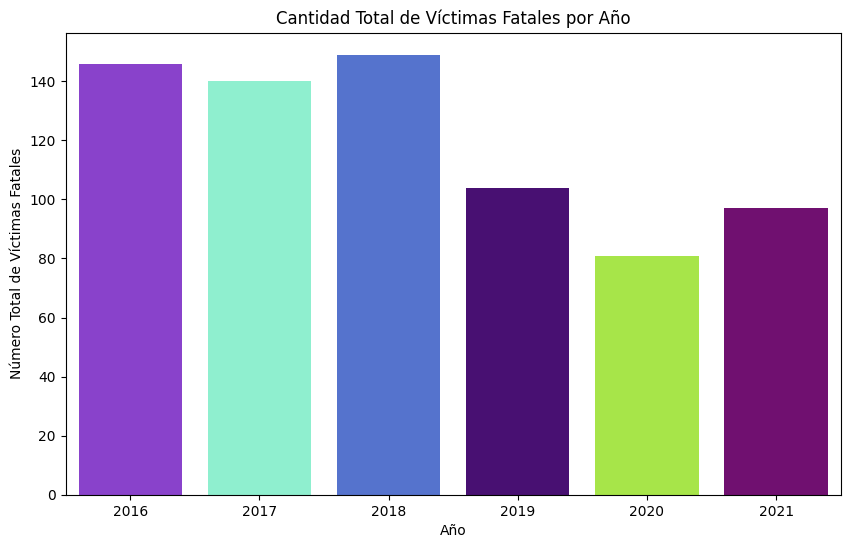

In [55]:
# Agrupo y sumar las víctimas por año
victimas_por_año = homicidios.groupby('AAAA_y')['N_VICTIMAS'].sum().reset_index()

#elijo colores
colores = ['blueviolet', 'aquamarine', 'royalblue', 'indigo', 'greenyellow', 'purple']

# Creo el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='AAAA_y', y='N_VICTIMAS', data=victimas_por_año, palette= colores)
plt.title('Cantidad Total de Víctimas Fatales por Año')
plt.xlabel('Año')
plt.ylabel('Número Total de Víctimas Fatales')
plt.show()


In [56]:


# Agrupo y sumo las víctimas por año
victimas_por_año = homicidios.groupby('AAAA_y')['N_VICTIMAS'].sum().reset_index()

# Imprimir la tabla
print(victimas_por_año)


   AAAA_y  N_VICTIMAS
0    2016         146
1    2017         140
2    2018         149
3    2019         104
4    2020          81
5    2021          97


### Rango de edad de las Victimas

#### Grafico la proporción de víctimas según su rango de edad. 
##### Infantes de 0 a 5
##### Niños de 6 a 11
##### Adolescentes de 12 a 17
#####  Jóvenes de 18 a 29
##### Adultos de 30 a 59
##### Ancianos de 60 en adelante

C:\Users\HP\AppData\Local\Temp\ipykernel_12380\174086566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios['EDAD'] = pd.to_numeric(homicidios['EDAD'], errors='coerce').astype('Int64')
C:\Users\HP\AppData\Local\Temp\ipykernel_12380\174086566.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios_edad.loc[Infantes, 'ciclo_vida'] = 'Infantes'


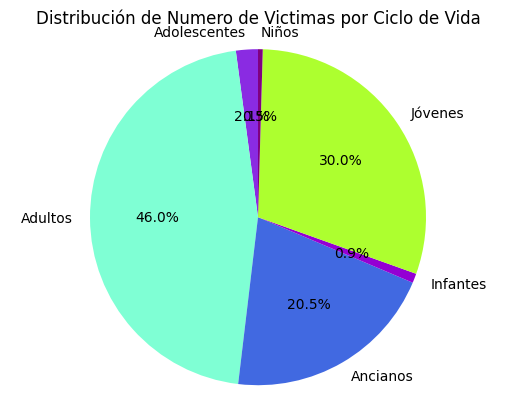

In [57]:

homicidios['EDAD'] = pd.to_numeric(homicidios['EDAD'], errors='coerce').astype('Int64')

homicidios_edad = homicidios[pd.to_numeric(homicidios['EDAD'], errors='coerce').notna()]


Infantes = (homicidios_edad['EDAD'] >= 0) & (homicidios_edad['EDAD'] < 6)
Niños = (homicidios_edad['EDAD'] >= 6) & (homicidios_edad['EDAD'] < 12)
Adolescentes = (homicidios_edad['EDAD'] >= 12) & (homicidios_edad['EDAD'] < 18)
Jovenes = (homicidios_edad['EDAD'] >= 18) & (homicidios_edad['EDAD'] < 30)
Adultos = (homicidios_edad['EDAD'] >= 30) & (homicidios_edad['EDAD'] < 60)
Ancianos = (homicidios_edad['EDAD'] >= 60)

# Crear una nueva columna 'ciclo_vida' acorde a los límites definidos
homicidios_edad.loc[Infantes, 'ciclo_vida'] = 'Infantes'
homicidios_edad.loc[Niños, 'ciclo_vida'] = 'Niños'
homicidios_edad.loc[Adolescentes, 'ciclo_vida'] = 'Adolescentes'
homicidios_edad.loc[Jovenes, 'ciclo_vida'] = 'Jóvenes'
homicidios_edad.loc[Adultos, 'ciclo_vida'] = 'Adultos'
homicidios_edad.loc[Ancianos, 'ciclo_vida'] = 'Ancianos'



# Agrupo por 'ciclo_vida' y sumo la cantidad de 'Numero de Victimas'
grupo_ciclo_vida = homicidios_edad.groupby('ciclo_vida')['N_VICTIMAS'].sum()

#elijo colores
colores = ['blueviolet', 'aquamarine', 'royalblue', 'darkviolet', 'greenyellow', 'purple']

# Grafico el resultado en un gráfico de torta
plt.pie(grupo_ciclo_vida, labels=grupo_ciclo_vida.index, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Distribución de Numero de Victimas por Ciclo de Vida')
plt.axis('equal')  # Equal aspect ratio asegura que el gráfico de pastel sea circular.
plt.show()





### Horario de los Accidentes

#### Visualizamos el rango de horario de los accidentes
#### Mañana de 6 a 11 hs
#### Tarde de 12 a 17 hs
#### Noche/Madrugada 18 a 5 hs

C:\Users\HP\AppData\Local\Temp\ipykernel_12380\2824723466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicidios['HH'] = pd.to_numeric(homicidios['HH'], errors='coerce').astype('Int64')


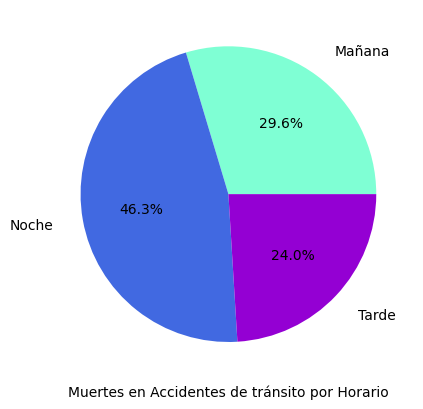

In [62]:

homicidios['HH'] = pd.to_numeric(homicidios['HH'], errors='coerce').astype('Int64')



# Definir los límites de los rangos horarios (mañana, tarde, noche/madrugada)
horas_manana = (homicidios['HH'] >= 6) & (homicidios['HH'] < 12)
horas_tarde = (homicidios['HH'] >= 12) & (homicidios['HH'] < 18)
horas_noche = (homicidios['HH'] >= 18) | (homicidios['HH'] < 6)

# Crear una nueva columna 'Horario' basada en los límites definidos
homicidios.loc[horas_manana, 'Horario'] = 'Mañana'
homicidios.loc[horas_tarde, 'Horario'] = 'Tarde'
homicidios.loc[horas_noche, 'Horario'] = 'Noche'

# Calcular la distribución de accidentes por rango horario
distribucion_Horario = homicidios['Horario'].value_counts().sort_index()

name='Mañana','Noche','Tarde'

#elijo colores
colores1 = ['aquamarine', 'royalblue', 'darkviolet']

# Graficar los datos
plt.pie(distribucion_Horario, labels=name, labeldistance=1.2,autopct="%1.1f%%", colors=colores1)
plt.xlabel("Muertes en Accidentes de tránsito por Horario")
plt.savefig("muertes_horario.png")
plt.show()

### Víctimas Fatales por Sexo

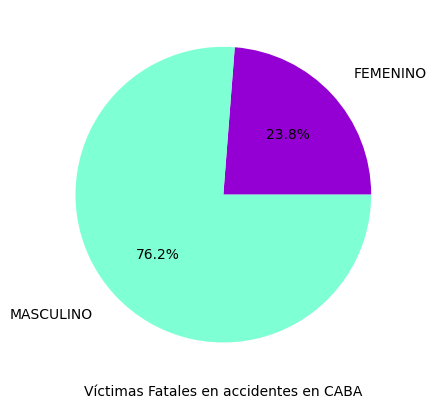

In [20]:

# Filtro el DataFrame excluyendo el grupo 'SD'
victimas_sexo = homicidios[homicidios['SEXO'] != 'SD']

# Contar la cantidad de víctimas por sexo en el DataFrame filtrado
victimas_sexo = victimas_sexo['SEXO'].value_counts().sort_index()

# Convierto los índices a cadena
nombres = victimas_sexo.index.astype(str)

# Cambié los colores a nombres de colores estándar
colores = ['darkviolet', 'aquamarine']

# Genero el gráfico de pastel con porcentajes

plt.pie(victimas_sexo, labels=nombres, labeldistance=1.2, autopct="%1.1f%%", colors=colores)
plt.xlabel("Víctimas Fatales en accidentes en CABA")
plt.savefig("muertes_sexo.png")
plt.show()


### Víctimas Fatales por Comuna

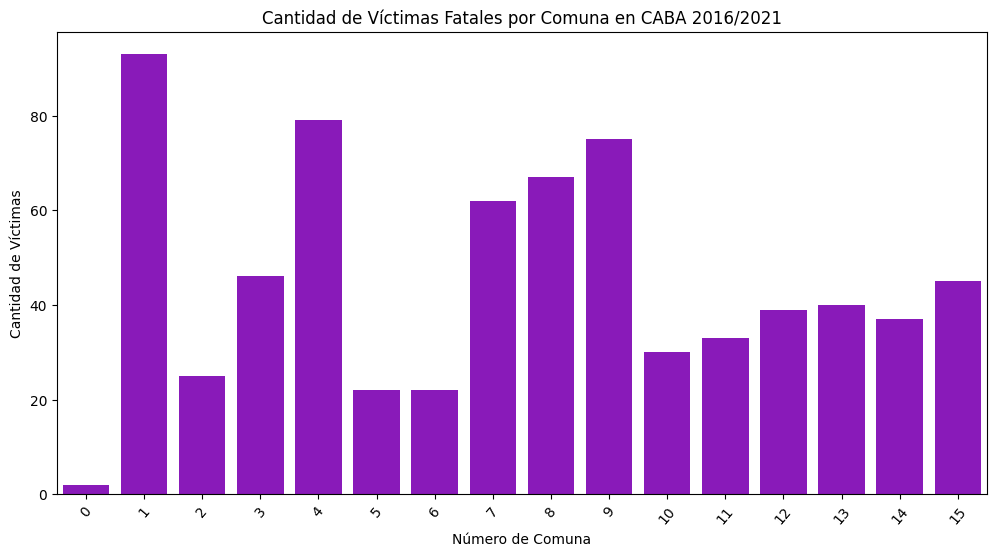

In [20]:

# Sumo las víctimas por comuna
victimas_comuna = homicidios.groupby('COMUNA')['N_VICTIMAS'].sum().sort_index()

# Se ajusta el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Grafico los datos
sns.barplot(x=victimas_comuna.index, y=victimas_comuna.values, color='darkviolet')
plt.xticks(rotation=50)

plt.xlabel('Número de Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas Fatales por Comuna en CABA 2016/2021')
plt.savefig('muertes_comuna.png')

plt.show()



### Accidentes por Tipo de Calle

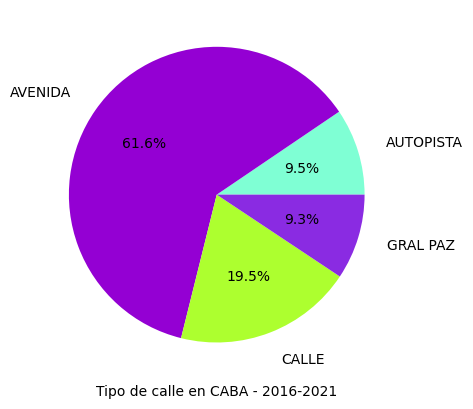

In [23]:

victimas_calle = homicidios['TIPO_DE_CALLE'].value_counts().sort_index()
name='AUTOPISTA','AVENIDA','CALLE','GRAL PAZ'

colores4= ['aquamarine', 'darkviolet', 'greenyellow', 'blueviolet']
# Grafico los datos
plt.pie(victimas_calle, labels=name, labeldistance=1.2,autopct="%1.1f%%", colors=colores4)
plt.xlabel("Tipo de calle en CABA - 2016-2021")
plt.savefig("muertes_calle.png")
plt.show()

### Tipo de Victimas Fatales

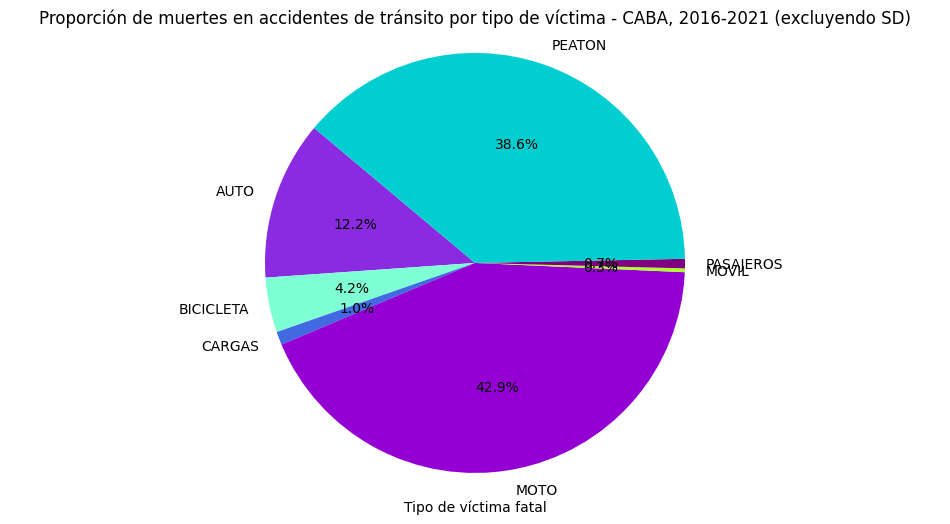

In [8]:
# Filtro el DataFrame excluyendo el grupo 'SD'
victimas_filtradas = homicidios[homicidios['VICTIMA_y'] != 'SD']
victimas = victimas_filtradas.groupby('VICTIMA_y').size().sort_index()

# Ajusto el tamaño del gráfico
plt.figure(figsize=(12, 6))  
colores5=  ['blueviolet', 'aquamarine', 'royalblue', 'darkviolet', 'greenyellow', 'purple', 'darkturquoise']
# Grafico los datos como un gráfico de pastel
plt.pie(victimas, labels=victimas.index, autopct='%1.1f%%', startangle=140, colors=colores5)
plt.axis('equal')  # Hace que el gráfico de pastel sea circular

plt.xlabel('Tipo de víctima fatal')
plt.title('Proporción de muertes en accidentes de tránsito por tipo de víctima - CABA, 2016-2021 (excluyendo SD)')
plt.savefig('muertes_victima_pie.png')

# Mostrar el gráfico
plt.show()



In [28]:

# Agrup por 'VICTIMA' y 'AAAA' y sumar los valores de 'N_VICTIMAS'
resultados = homicidios.groupby(['VICTIMA_y', 'AAAA_y'])['N_VICTIMAS'].sum().reset_index()

# Mostrar los resultados
print(resultados)

    VICTIMA_y  AAAA_y  N_VICTIMAS
0        AUTO    2016          18
1        AUTO    2017          25
2        AUTO    2018          17
3        AUTO    2019          11
4        AUTO    2020          12
5        AUTO    2021          11
6   BICICLETA    2016           4
7   BICICLETA    2017           4
8   BICICLETA    2018           3
9   BICICLETA    2019           7
10  BICICLETA    2020           5
11  BICICLETA    2021           6
12     CARGAS    2016           3
13     CARGAS    2017           2
14     CARGAS    2018           2
15       MOTO    2016          65
16       MOTO    2017          56
17       MOTO    2018          57
18       MOTO    2019          50
19       MOTO    2020          28
20       MOTO    2021          46
21      MOVIL    2016           1
22      MOVIL    2018           2
23  PASAJEROS    2016           1
24  PASAJEROS    2018           2
25  PASAJEROS    2019           1
26  PASAJEROS    2021           1
27     PEATON    2016          49
28     PEATON 

## KPIs

#### Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

Definimos a la tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000


In [23]:
# FiltrO el DataFrame para incluir solo los meses 7 a 12 y los años 2021
filtro_mes_año = (homicidios['MM_y'].between(7, 12)) & (homicidios['AAAA_y'] == 2021)
victimas_suma = homicidios.loc[filtro_mes_año, 'N_VICTIMAS'].sum()

print(f"La suma de las víctimas fatales en el segundo semestre del año 2021 es: {victimas_suma}")


La suma de las víctimas fatales en el segundo semestre del año 2021 es: 42


#### Tasa de Homicidios en el segundo semestre del 2021

In [24]:
(42/3121707)*100000

1.345417747405506

#### Para lograr cumplir el KPI en el primer semestre del 2022 hay que reducir en un 10% la tasa del semestre anterior 

In [26]:
numero = 1.345417747405506
porcentaje_10 = numero * 0.1

print(f"El 10% de {numero} es: {porcentaje_10}")


El 10% de 1.345417747405506 es: 0.1345417747405506


In [27]:
42*0.1

4.2

#### Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior

Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año actual - Número de accidentes mortales con víctimas en moto en el año anterior) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100


In [31]:
(46-28)/28*100

64.28571428571429

#### Teniendo en cuenta que los peatones, después de las motos, son los actores viales que presentan mayor porcentage de víctimas fatales, se propone reducir en un 10% respecto del año anterior. Para eso se tomará como parámetro las muertes totales de peatones en el año 2021, que fueron 33.

In [34]:
(10/100)*33

3.3000000000000003

In [24]:
homicidios.to_csv('homicidios_limpio.csv',index=False)